In [2]:
import numpy as np
import xgboost as xgb

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the data
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model parameters
params = {
    'objective': 'multi:softmax',  # Specify the objective type
    'num_class': 3,                # Number of classes
    'max_depth': 3,                # Maximum depth of the trees
    'eta': 0.1,                    # Learning rate
    'eval_metric': 'mlogloss'      # Evaluation metric
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")






Accuracy: 100.00%


In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for easier data manipulation and visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map the target integers to species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Display the first few rows of the DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


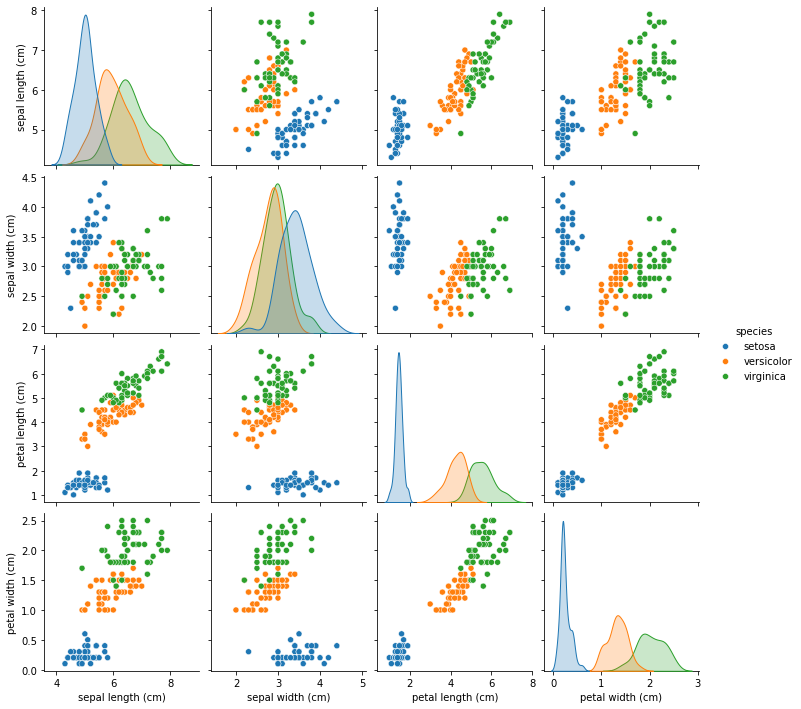

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(iris_df, hue='species')
plt.show()
